# Intro

Here's a simple example where we produce a set of plots, called a tear sheet, for a single stock.

## Imports and Settings

In [1]:
# silence warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import yfinance as yf
import pyfolio as pf
import pandas as pd
import os
import numpy as np

In [3]:
data_path = os.path.join('data', 'GBPUSD.csv')

In [4]:
#s = yf.download(
    #tickers='GBPUSD=X',
    #start='2003-11-01'
#)
#s.to_csv(
    #os.path.join(
        #'data',
        #'GBPUSD.csv'
    #),
    #index=True
#)
s = pd.read_csv(data_path, index_col=0, parse_dates=True)
s.index = s.index.tz_localize('utc')

In [5]:
s_returns = s.Close.pct_change()

In [6]:
rw_returns = (
    s_returns.shift(1)
    .pipe(np.sign)
    .pipe(lambda x: x * s_returns)
    .dropna()
)

Start date,2003-12-03
End date,2024-02-09
Total months,250
,Backtest
Annual return,0.683%
Cumulative returns,15.246%
Annual volatility,9.473%
Sharpe ratio,0.12
Calmar ratio,0.02
Stability,0.53
Max drawdown,-34.989%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,34.99,2004-01-19,2008-08-01,2010-05-14,1650
1,24.58,2010-12-02,2015-04-10,2016-07-08,1462
2,24.55,2020-08-19,2023-05-23,NaT,NaN
3,14.45,2017-01-31,2019-03-25,2020-03-12,813
4,8.76,2016-07-13,2016-10-11,2017-01-31,145


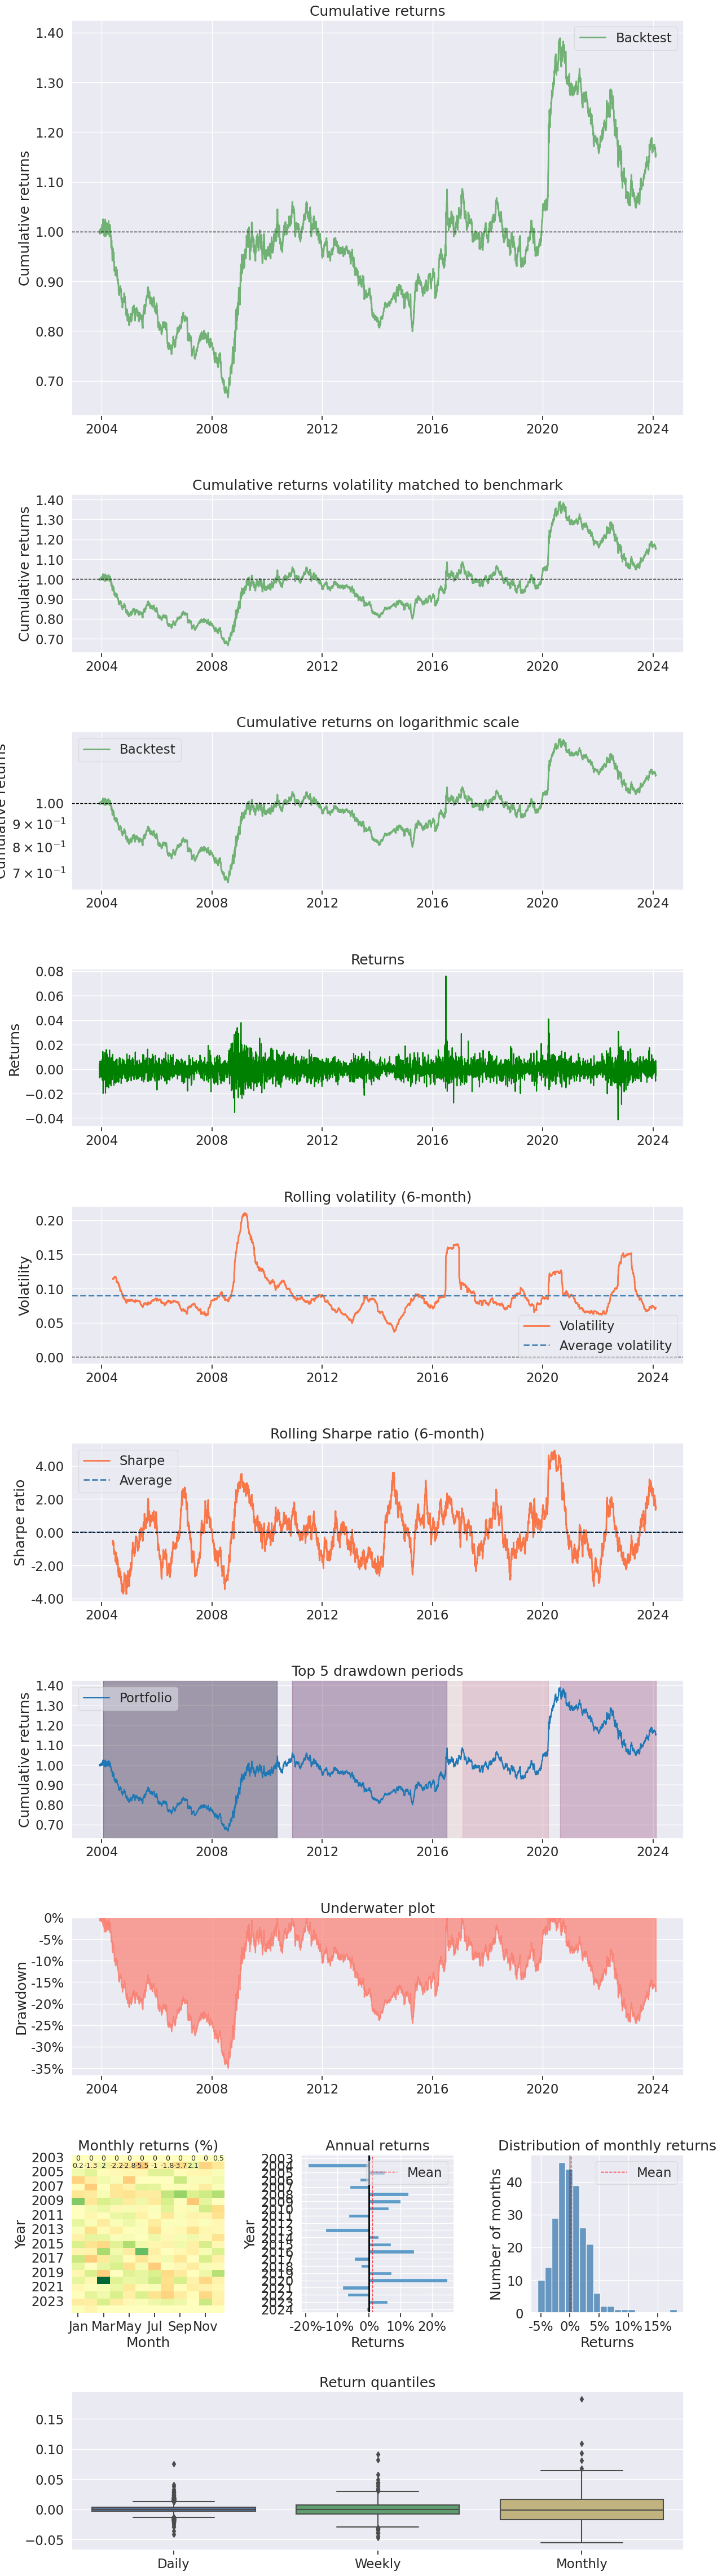

In [7]:
pf.create_returns_tear_sheet(rw_returns)